In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [139]:
country_df = pd.read_csv('Country-data.csv')

In [140]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [141]:
country_df.shape

(167, 10)

In [142]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### data quality check 
- we can see that with the given columns discription that health importd and exports are in percentages of GDP we have to chanege them to actual values

In [143]:
# converting exports, health, income to actual values by multiplying with GDP and dividing them by 100
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['income'] = country_df['income']*country_df['gdpp']/100

In [144]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,44.9,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,48.6,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,31.4,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,42.9,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,58.9,2330200.0,1.44,76.8,2.13,12200


### rounding off the converted columns to 2 decimal points using round function

In [145]:
country_df[['exports','health','income']] = country_df[['exports','health','income']].round(2)

In [146]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,44.9,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,48.6,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,31.4,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,42.9,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,58.9,2330200.0,1.44,76.8,2.13,12200


## performing EDA

### check for  missing values

In [147]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# major segments of this assignment

- data qulaity check: ppt
- EDA
- perform OUtliers Treatment
- Scaling
- checking the tendency of the data: hopkins test    
- Checking the best value for K: ssd, silhowett method
- perform Kmeans with the final value of K 
- Visualize the clusters using scatter plot
- perform cluster profiling: GDPP, CHILD_MORT, INCOME


- hierarchial clustering
- single linkage dendogram
- complete linkage dendogram
- use the suitable method and cut the dendogram
- perform clustering profiling

- Using both theresults and report the countried that are in need of the AID

### preparing data for plotting distplot we need to bring only the columns list with numerical variables and assigning them to temp(f)

In [150]:
list(enumerate(country_df))

[(0, 'country'),
 (1, 'child_mort'),
 (2, 'exports'),
 (3, 'health'),
 (4, 'imports'),
 (5, 'income'),
 (6, 'inflation'),
 (7, 'life_expec'),
 (8, 'total_fer'),
 (9, 'gdpp')]

In [151]:
f = country_df.columns[1:]
f

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

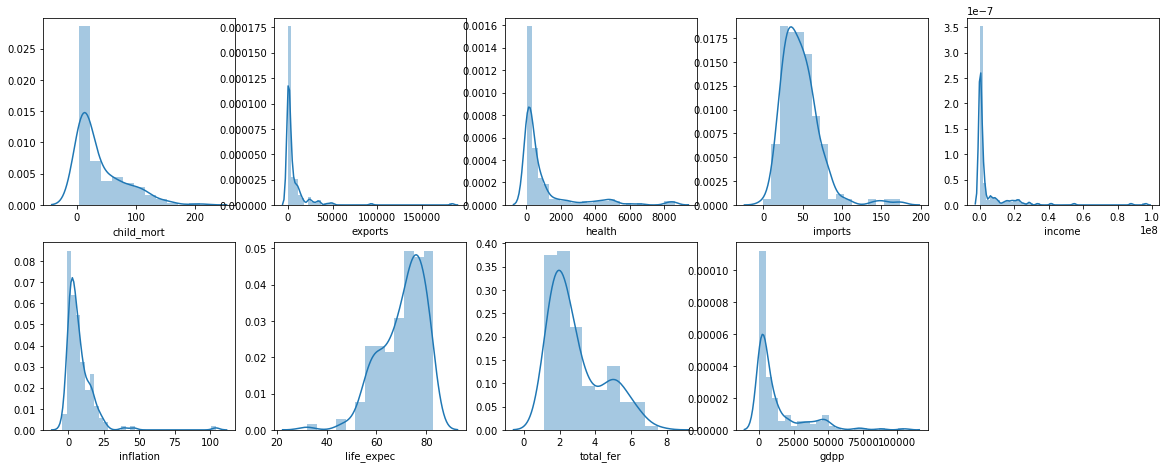

In [152]:
# lets perform EDA
plt.figure(figsize=(20,20))
f = country_df.columns[1:]
for i in enumerate(f):
    plt.subplot(5,5,i[0]+1)
    sns.distplot(country_df[i[1]])

In [153]:
# univariate analysis
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,46.890215,5.368146e+06,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,24.209589,1.280996e+07,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.065900,1.764840e+03,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,30.200000,4.888200e+04,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,43.300000,4.999920e+05,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,58.750000,3.117750e+06,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,174.000000,9.628500e+07,104.000000,82.800000,7.490000,105000.000000


### here we can see the distribution of data for all the columns from their max to min 

## outlier Analysis and treatment

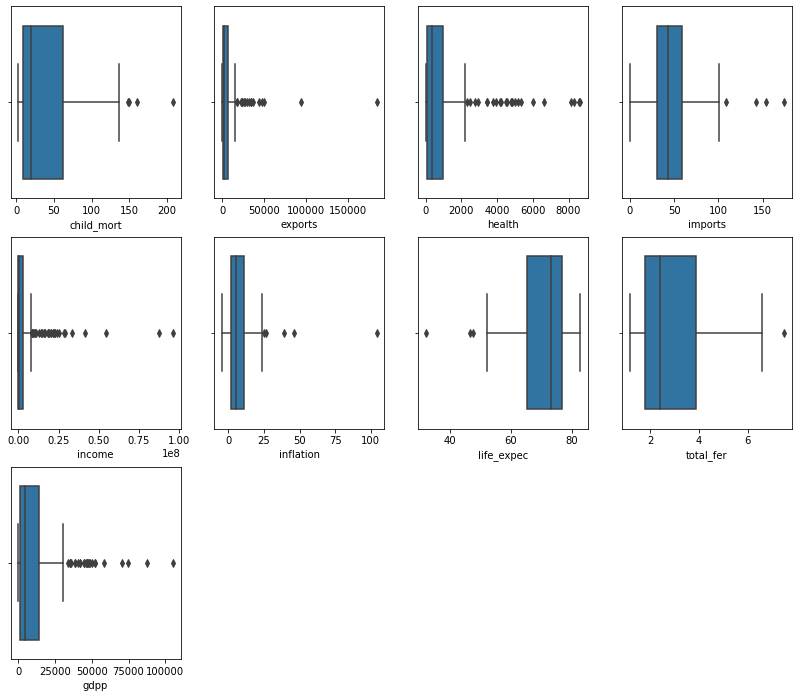

In [155]:
plt.figure(figsize = (14,12))
f = country_df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(x = i[1], data =country_df)

## here we can see clearly the only life_expec has the outliers at lower indices rest all has the outlier at upper index

# perform the outliers for every object and check for the upper and lower range do not remove upper range for child_mort and inflation other columns can be removed for upper index because we may loose the countries who's high child mortality means in desire need of aid

## capping the upper quartiles having outliers to 99th percentile

In [156]:
exp = country_df['exports'].quantile(0.99)
country_df['exports'][country_df['exports'] > exp] = exp

heal = country_df['health'].quantile(0.99)
country_df['health'][country_df['health'] > heal] = heal

inc = country_df['income'].quantile(0.99)
country_df['income'][country_df['income']>inc] = inc

gdp = country_df['gdpp'].quantile(0.99)
country_df['gdpp'][country_df['gdpp']> gdp] = gdp

life_exp = country_df['life_expec'].quantile(0.90)
country_df['life_expec'][country_df['life_expec']>life_exp] = life_exp

imp = country_df['imports'].quantile(0.99)
country_df['imports'][country_df['imports'] < imp] = imp


## capping the outliers on the lower quartiles

In [157]:
child_mr = country_df['child_mort'].quantile(0.01)
country_df['child_mort'][country_df['child_mort'] < child_mr] = child_mr

imp = country_df['imports'].quantile(0.01)
country_df['imports'][country_df['imports'] < imp] = imp

inflat = country_df['inflation'].quantile(0.01)
country_df['inflation'][country_df['inflation'] < inflat] = inflat

total_f = country_df['total_fer'].quantile(0.01)
country_df['total_fer'][country_df['total_fer'] < total_f] = total_f

In [158]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214790,1054.206592,146.294611,5.055560e+06,7.798194,70.442515,2.948601,12756.826347
std,40.327869,11415.308582,1790.845357,2.242204,1.083768e+07,10.553699,8.755566,1.513108,17430.208938
min,2.800000,1.080000,12.820000,146.080000,1.764840e+03,-2.348800,32.100000,1.243200,231.000000
25%,8.250000,447.140000,78.535000,146.080000,4.888200e+04,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,146.080000,4.999920e+05,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,146.080000,3.117750e+06,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,174.000000,6.597910e+07,104.000000,80.400000,7.490000,79088.000000


## univariate Analysis

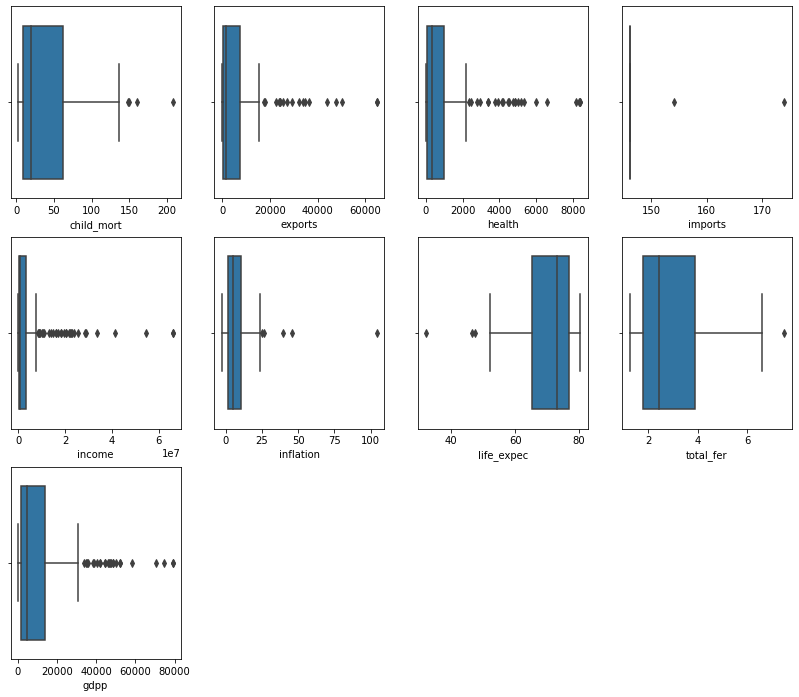

In [159]:
plt.figure(figsize = (14,12))
for i in enumerate(f):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(x = i[1], data =country_df)

## we can clearly see still the data consists of outliers but we still keep those because we cannot remove those as they might risk our analysis and we may end up providing AID for wrong countries

## Bivariate Analysis

## checking for to 5 child mortality rate countries

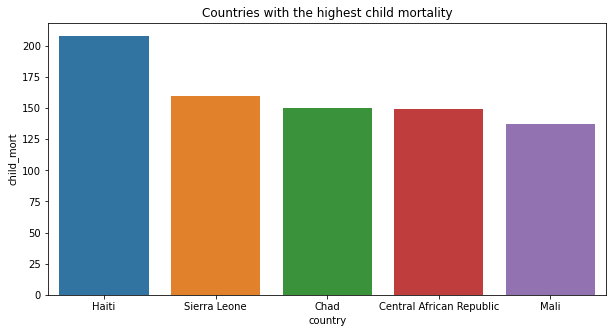

In [160]:

plt.figure(figsize = (10,5))
child = country_df.sort_values(by = 'child_mort', ascending = False ).head(5)
plt.title('Countries with the highest child mortality')
sns.barplot(y = 'child_mort', x = 'country', data = child)
plt.show()

# high child mortality rate country is Haiti

## checking top 5 countries with low income

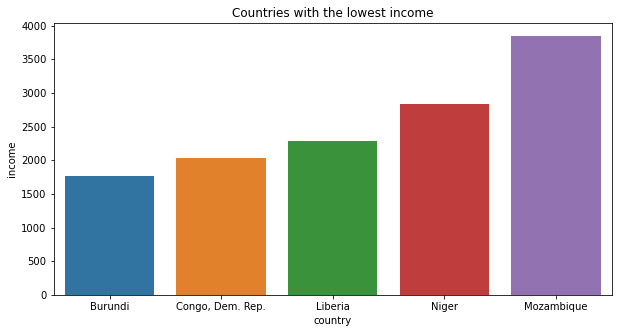

In [161]:
plt.figure(figsize = (10,5))
income = country_df.sort_values(by = 'income', ascending = True).head(5)
plt.title('Countries with the lowest income')
sns.barplot(y = 'income', x = 'country', data = income)
plt.show()

# burundi has the low income out of all countries

## Top 5 countries with low GDPP expenditure

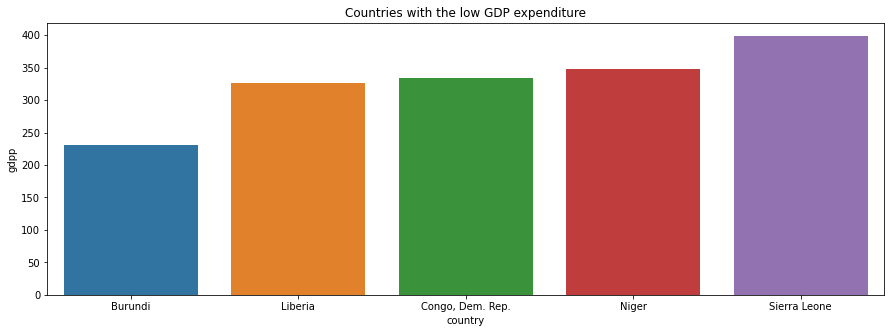

In [213]:
plt.figure(figsize = (15,5))
health = country_df.sort_values(by = 'gdpp', ascending = True).head(5)
plt.title('Countries with the low GDP expenditure')
sns.barplot(y = 'gdpp', x = 'country', data = health)
plt.show()

# Burundi has LOW GDP as well as low income 

## top 5 countries with high inflation rate

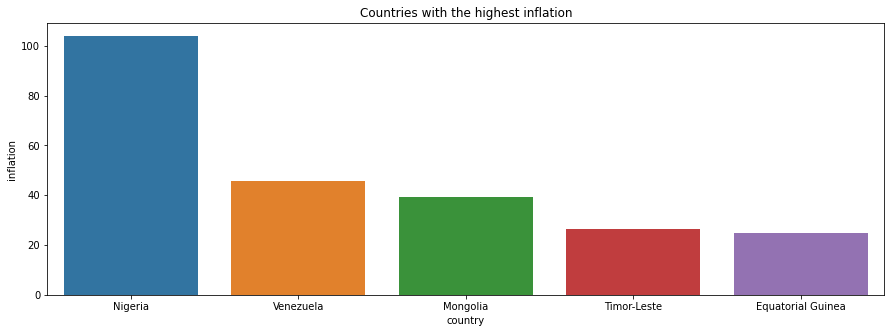

In [163]:
plt.figure(figsize = (15,5))
inflation = country_df.sort_values(by = 'inflation', ascending = False ).head(5)
plt.title('Countries with the highest inflation')
sns.barplot(y = 'inflation', x = 'country', data = inflation)
plt.show()


# nigeria is the country with high inflation rate

## HOPKINS: Cluster Tendency

In [164]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [165]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,146.08,8903.3,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.90,146.08,406137.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.98,146.08,575340.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.60,146.08,208270.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.66,146.08,2330200.0,1.44,76.8,2.13,12200.0


In [166]:
# dropping the first column which is categorical column and check for hopkins score
df_1 = country_df.drop('country', axis =1)
hopkins(df_1)


0.965229800868489

## scaling of data

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

df_scaled = scaler.fit_transform(df_1)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_1.columns
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-7.977650e-18,8.575974e-17,-6.648042e-19,5.025089e-15,1.794971e-17,8.310053e-17,6.169383e-16,5.451394e-17,8.044131e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.822172e-01,-5.743862e-01,-5.832545e-01,-9.600209e-02,-4.677197e-01,-9.643549e-01,-4.392387e+00,-1.130475e+00,-7.207887e-01
25%,-7.466684e-01,-5.351931e-01,-5.464492e-01,-9.600209e-02,-4.633591e-01,-5.691089e-01,-5.891089e-01,-7.646981e-01,-6.575476e-01
50%,-4.718403e-01,-4.183061e-01,-4.101521e-01,-9.600209e-02,-4.216096e-01,-2.288711e-01,3.044324e-01,-3.570275e-01,-4.659254e-01
75%,5.926524e-01,6.500132e-02,-4.327508e-02,-9.600209e-02,-1.793408e-01,2.805352e-01,7.282917e-01,6.174048e-01,7.441465e-02
max,4.221379e+00,5.118675e+00,4.119980e+00,1.239348e+01,5.638365e+00,9.142873e+00,1.140695e+00,3.010398e+00,3.816975e+00


## now data has been scaled and all the preprocessing has been doen and we can now perform Kmwans Clustering

# K Means Clustering

### determining number of cliusters using Silhouette score

In [168]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
## silhouette analysis
silhouette = []
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
##initialise k-means using maximun iterations of upto 50 

    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_ 
    
##silhouette score 
    
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    
    print('for n_clusters={0}, the silhouette score is {1}'. format(num_clusters, silhouette_avg))
    silhouette.append(silhouette_avg)

for n_clusters=2, the silhouette score is 0.47496200263631067
for n_clusters=3, the silhouette score is 0.433954386584042
for n_clusters=4, the silhouette score is 0.4423117879468067
for n_clusters=5, the silhouette score is 0.4408389792549506
for n_clusters=6, the silhouette score is 0.44708736036555474
for n_clusters=7, the silhouette score is 0.313799604806355
for n_clusters=8, the silhouette score is 0.31599564687821


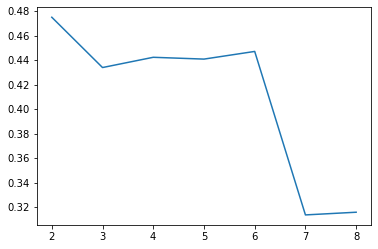

In [169]:
plt.plot(range_n_clusters, silhouette)

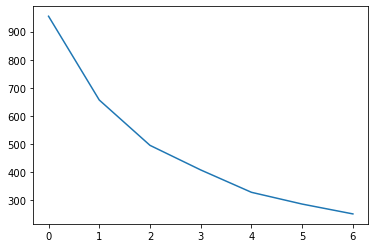

In [170]:
## Elbow curve i.e. sum of squared distances 
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters: 
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)  
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)

#plot the ssd for each n_clusters  
plt.plot(ssd)

## From the above analysis we can conclude that we can go with the K = 4 as od silhouette score we can see for K = 4,5,6 the score isnt much different and can conclude k = 4 to be in safer side

# K = 4

In [171]:
kmeans = KMeans(n_clusters = 4, random_state = 100)  
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=100)

In [172]:
# plotting labels
kmeans.labels_

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3,
       0, 1, 0, 3, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3, 3, 0, 1, 3, 0, 0, 0, 3, 3, 0,
       3, 0, 1, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 1, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 2, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3])

In [175]:
# assigning the labels to the respective cluster ID's
country_df['cluster_id'] = kmeans.labels_ 

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,146.08,8903.3,9.44,56.2,5.82,553.0,3
1,Albania,16.6,1145.20,267.90,146.08,406137.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.98,146.08,575340.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.60,146.08,208270.0,22.40,60.1,6.16,3530.0,3
4,Antigua and Barbuda,10.3,5551.00,735.66,146.08,2330200.0,1.44,76.8,2.13,12200.0,0


In [177]:
country_df.cluster_id.value_counts() 

0    94
3    48
1    24
2     1
Name: cluster_id, dtype: int64

## we got the clusters assigned to the respective countries and lets plot them and analyse further

# plotting
- LOW GDPP, 
- LOW INCOME 
- HIGH CHILD_MORT

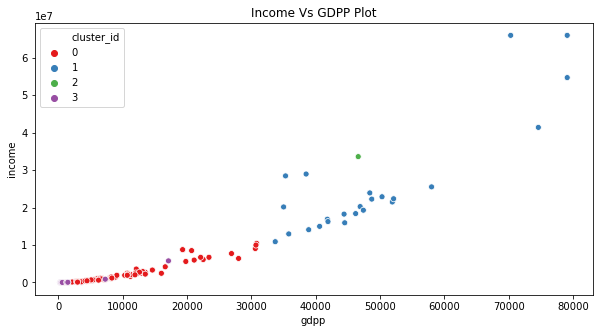

In [178]:
# Plot for income vs GDPP for 5 clusters
plt.figure(figsize = (10,5))
plt.title('Income Vs GDPP Plot')
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = country_df,  palette = 'Set1')
plt.savefig('Income Vs GDPP Plot')

## low income and low GDP are in cluster - 0
## high income and high GDP are in cluster - 1

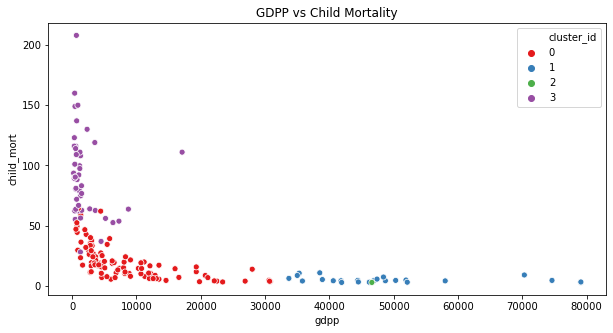

In [179]:
# Plot for GDPP VS CHILD MORTALITY for 5 clusters

plt.figure(figsize = (10,5))
plt.title('GDPP vs Child Mortality')
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = country_df,  palette = 'Set1')
plt.savefig('GDPP vs Child Mortality')

## High child mottality are in cluster - 3 & low in cluster - 1
## low gdp and low child mortality in cluster - 0

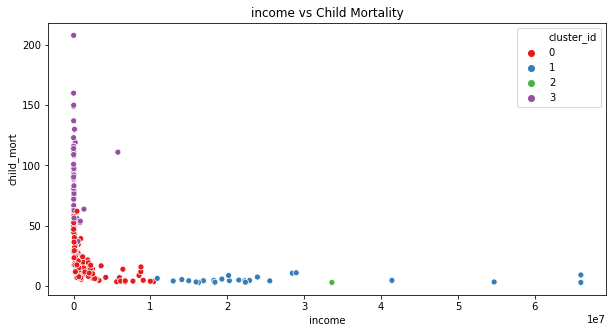

In [180]:
# Plot for Income vs Child mortality for 5 clusters
plt.figure(figsize = (10,5))
plt.title('income vs Child Mortality')
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = country_df,  palette = 'Set1')
plt.savefig('Income vs Child Mortality')

In [182]:
df_scaled['cluster_id'] = kmeans.labels_
df_scaled['country'] = country_df['country']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
0,1.291537,-0.569622,-0.566956,-0.096002,-0.467059,0.156035,-1.631574,1.903390,-0.702259,3,Afghanistan
1,-0.538993,-0.473858,-0.440391,-0.096002,-0.430296,-0.314406,0.671013,-0.860816,-0.498726,0,Albania
2,-0.272870,-0.424000,-0.486272,-0.096002,-0.414636,0.788991,0.693925,-0.038846,-0.477434,0,Algeria
3,2.007831,-0.381249,-0.534091,-0.096002,-0.448608,1.387733,-1.184803,2.128769,-0.530950,3,Angola
4,-0.695682,-0.086742,-0.178410,-0.096002,-0.252227,-0.604273,0.728292,-0.542634,-0.032042,0,Antigua and Barbuda


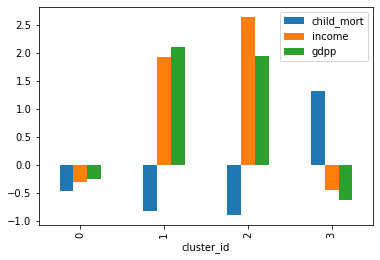

In [184]:
df_scaled.drop(['inflation', 'imports', 'exports', 'total_fer','life_expec','health'],axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

## list of countries in immediate need of aid are in the cluster 3 as it having high child mortality rate and low income and gdp countries

In [185]:
# getting the list of countries in cluster 3
cluster3 = country_df[country_df['cluster_id']== 3]
print(cluster3['country'].tolist())

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


# Top 5 countries in need of aid

In [186]:
country_df[country_df['cluster_id'] == 3].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.29,45.74,146.08,9930.00,5.45,32.1,3.33,662.0,3
132,Sierra Leone,160.0,67.03,52.27,146.08,4867.80,17.20,55.0,5.20,399.0,3
32,Chad,150.0,330.10,40.63,146.08,17312.10,6.39,56.5,6.59,897.0,3
31,Central African Republic,149.0,52.63,17.75,146.08,3960.48,2.01,47.5,5.21,446.0,3
97,Mali,137.0,161.42,35.26,146.08,13239.60,4.37,59.5,6.55,708.0,3


# countries with immediate need of aid after Kmean clustering 

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali

# Hierarchical Clustering

### finding out the top 5 countries in need using hierarchical clustering 

In [188]:
from scipy.cluster.hierarchy import linkage  
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree

In [189]:
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,167.000000
mean,-7.977650e-18,8.575974e-17,-6.648042e-19,5.025089e-15,1.794971e-17,8.310053e-17,6.169383e-16,5.451394e-17,8.044131e-17,1.017964
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.314759
min,-8.822172e-01,-5.743862e-01,-5.832545e-01,-9.600209e-02,-4.677197e-01,-9.643549e-01,-4.392387e+00,-1.130475e+00,-7.207887e-01,0.000000
25%,-7.466684e-01,-5.351931e-01,-5.464492e-01,-9.600209e-02,-4.633591e-01,-5.691089e-01,-5.891089e-01,-7.646981e-01,-6.575476e-01,0.000000
50%,-4.718403e-01,-4.183061e-01,-4.101521e-01,-9.600209e-02,-4.216096e-01,-2.288711e-01,3.044324e-01,-3.570275e-01,-4.659254e-01,0.000000
75%,5.926524e-01,6.500132e-02,-4.327508e-02,-9.600209e-02,-1.793408e-01,2.805352e-01,7.282917e-01,6.174048e-01,7.441465e-02,3.000000
max,4.221379e+00,5.118675e+00,4.119980e+00,1.239348e+01,5.638365e+00,9.142873e+00,1.140695e+00,3.010398e+00,3.816975e+00,3.000000


# single linkage

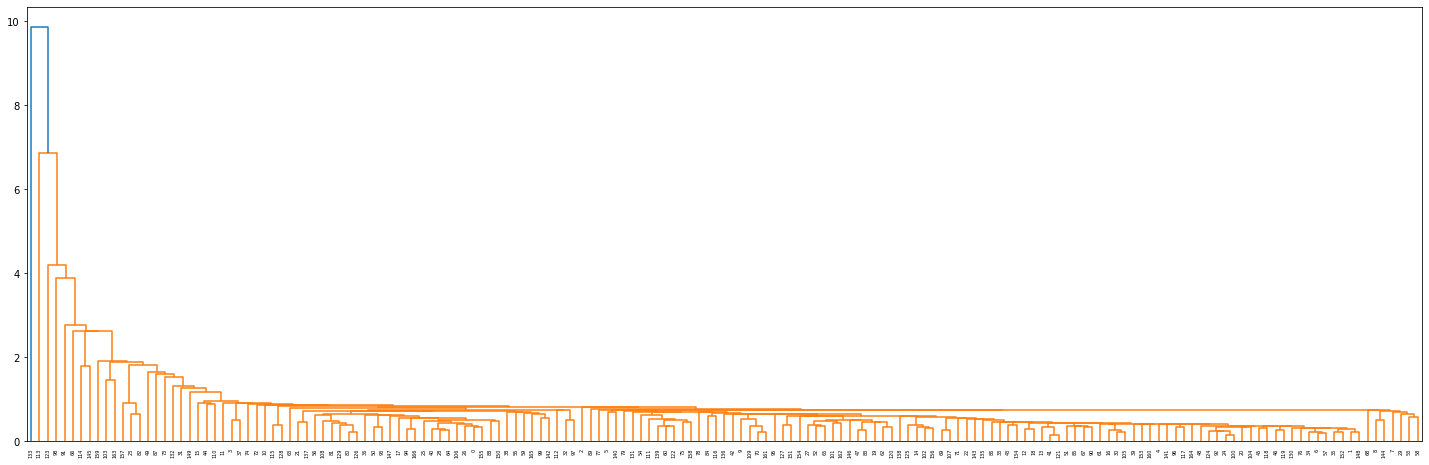

<Figure size 432x288 with 0 Axes>

In [190]:
new = df_scaled.drop(['country','cluster_id'], axis =1).copy()

plt.figure(figsize = (25,8))
mergings = linkage(new, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()
plt.savefig('single_Linkage')

# complete linkage

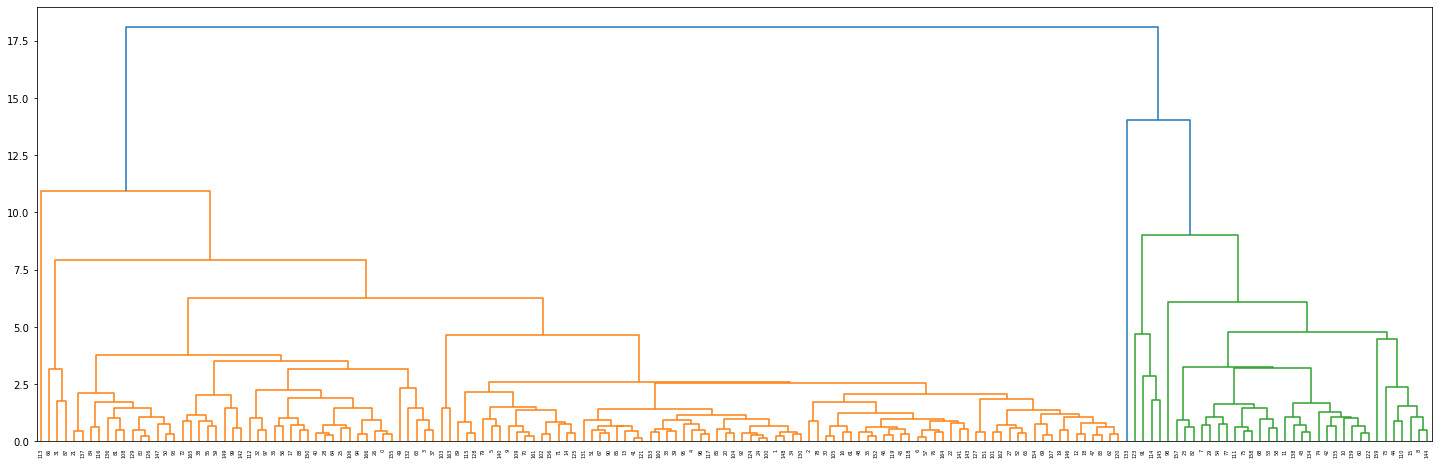

<Figure size 432x288 with 0 Axes>

In [191]:
plt.figure(figsize = (25,8))
complete_mergings = linkage(new, method = 'complete', metric = 'euclidean')
dendrogram(complete_mergings)
plt.show()
plt.savefig('complete_Linkage')


In [194]:
cut_tree(complete_mergings, n_clusters = 6)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

# assign cluster labels

In [195]:
labels = cut_tree(complete_mergings, n_clusters = 6).reshape(-1, )
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [198]:
country_df['hirar_label'] = labelsh
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,hac_complete_labels,hirar_label
0,Afghanistan,90.2,55.30,41.92,146.08,8903.3,9.44,56.2,5.82,553.0,3,0,0
1,Albania,16.6,1145.20,267.90,146.08,406137.0,4.49,76.3,1.65,4090.0,0,0,0
2,Algeria,27.3,1712.64,185.98,146.08,575340.0,16.10,76.5,2.89,4460.0,0,0,0
3,Angola,119.0,2199.19,100.60,146.08,208270.0,22.40,60.1,6.16,3530.0,3,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,146.08,2330200.0,1.44,76.8,2.13,12200.0,0,0,0


In [204]:
country_df['hirar_label'].value_counts()

0    126
1     32
3      4
2      3
5      1
4      1
Name: hirar_label, dtype: int64

# Plot for income vs GDPP for 5 clusters

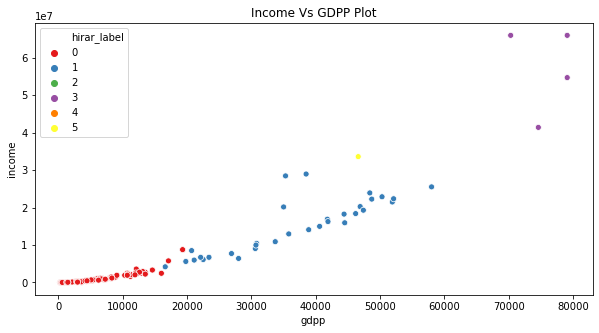

In [201]:
plt.figure(figsize = (10,5))
plt.title('Income Vs GDPP Plot')
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'hirar_label', data = country_df,  palette = 'Set1')
plt.savefig('Income Vs GDPP Plot')

# Plot for GDPP VS CHILD MORTALITY for 5 clusters

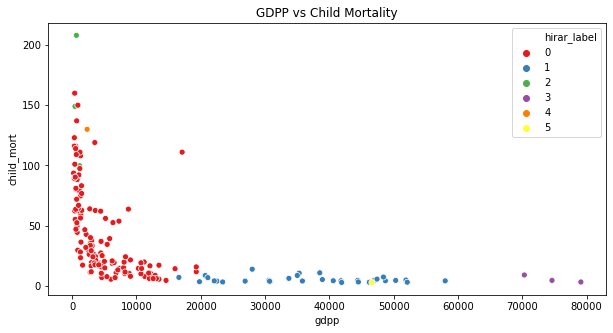

In [202]:
plt.figure(figsize = (10,5))
plt.title('GDPP vs Child Mortality')
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'hirar_label', data = country_df,  palette = 'Set1')
plt.savefig('GDPP vs Child Mortality')

# Plot for Income vs Child mortality for 5 clusters

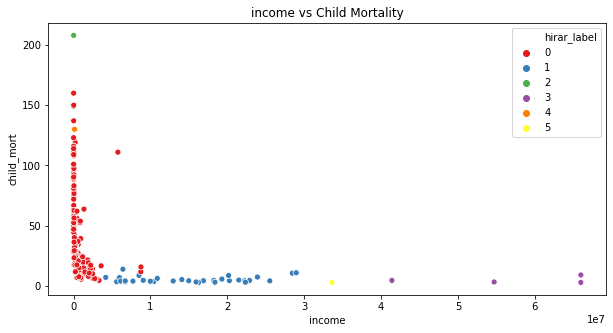

In [203]:
plt.figure(figsize = (10,5))
plt.title('income vs Child Mortality')
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'hirar_label', data = country_df,  palette = 'Set1')
plt.savefig('Income vs Child Mortality')

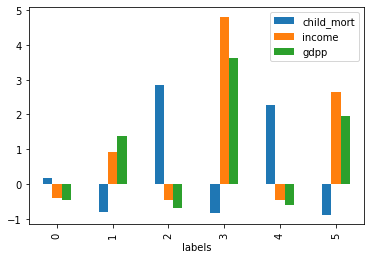

In [205]:
new['labels'] = labels 
new.drop(['inflation', 'imports', 'exports', 'total_fer','life_expec','health'],axis = 1).groupby('labels').mean().plot(kind = 'bar')

## countries in immediate aid as per heirarcial clustering are in cluster 2, 4 and in 0 we need to identofy the top 5 countruesin need

# listing the countries from clusters 0,2,4

In [206]:
## Countries in Cluster 0
country_df[country_df['hirar_label'] == 0].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,hac_complete_labels,hirar_label
132,Sierra Leone,160.0,67.03,52.27,146.08,4867.80,17.20,55.0,5.20,399.0,3,0,0
32,Chad,150.0,330.10,40.63,146.08,17312.10,6.39,56.5,6.59,897.0,3,0,0
97,Mali,137.0,161.42,35.26,146.08,13239.60,4.37,59.5,6.55,708.0,3,0,0
112,Niger,123.0,77.26,17.96,146.08,2832.72,2.55,58.8,7.49,348.0,3,0,0
3,Angola,119.0,2199.19,100.60,146.08,208270.00,22.40,60.1,6.16,3530.0,3,0,0


In [207]:
## Countries in Cluster 2
country_df[country_df['hirar_label'] == 2].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,hac_complete_labels,hirar_label
66,Haiti,208.0,101.29,45.74,146.08,9930.00,5.45,32.1,3.33,662.0,3,2,2
31,Central African Republic,149.0,52.63,17.75,146.08,3960.48,2.01,47.5,5.21,446.0,3,2,2
87,Lesotho,99.7,460.98,129.87,146.08,27846.00,4.15,46.5,3.30,1170.0,3,2,2


In [208]:
## Countries in Cluster 4
country_df[country_df['hirar_label'] == 4].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,hac_complete_labels,hirar_label
113,Nigeria,130.0,589.49,118.13,146.08,119995.0,104.0,60.5,5.84,2330.0,3,4,4


In [ ]:
	country	child_mort	exports	health	imports	income	inflation	life_expec	total_fer	gdpp	cluster_id


32	Chad	150.0	330.10	40.63	146.08	17312.10	6.39	56.5	6.59	897.0	3

97	Mali	137.0	161.42	35.26	146.08	13239.60	4.37	59.5	6.55	708.0	3

# list of countries from heirarchial clustering
- Haiti
- Central African Republic
- Lesotho
- Nigeria
- Sierra Leone

# countries with immediate need of aid after Kmean clustering 

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali

# Final list of top 5 countries to provide AID are:
- Haiti
- Central African Republic
- Sierra Leone
- Chad
- Mali